# Background

The Coupled Model Intercomparison Project (CMIP) is a huge international collaborative effort to improve the knowledge about climate change and its impacts on the Earth System and on our society. It’s been going around since the 90s and today we are heading to its sixth phase (CMIP6), which will provide a wealth of information for the next Assessment Report (AR6) of the Intergovernmental Panel on Climate Change (IPCC).

CMIP6 is sponsoring several different groups working on several different scientific questions, from the climates of the distant past to the impacts of deforestation and land-use changes. When finished, the entire project is estimated to release about 20 to 40 petabytes of data from more than 20 climate models.

<center><img src="https://wcrp-cmip.org/wp-content/uploads/2023/05/CMIP6_editted-2-1024x889.png" width=500 height=500/><center>

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### Installation ###
# conda install matplotlib xarray
# pip install cartopy

In [14]:
dset = xr.open_dataset("../data/CMIP6_preciptation/pr_Amon_CESM2_ssp585_r4i1p1f1_gn_20990115-20991215.nc")
print(dset)

<xarray.Dataset> Size: 3MB
Dimensions:    (time: 12, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 96B 2099-01-15 12:00:00 ... 2099-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    pr         (time, lat, lon) float32 3MB ...
    time_bnds  (time, nbnd) object 192B ...
    lat_bnds   (lat, nbnd) float64 3kB ...
    lon_bnds   (lon, nbnd) float64 5kB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   735110.0
    branch_time_in_parent:  735110.0
    case_id:                1735
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/af147846-667d-479d-a02c-c03009ea1ba9
    variable_

Recall this image from the lecture. Climate datasets are structured in a multidimensional array: a bi-dimensional grid representing a geographic region indexed by a set of coordinates (x, y) and a third dimension containing the value of the variable for each pixel.

The third dimension can contain several layers that we refer to as bands. Each band for each variable (in case of multiple variables) and time (if there is a temporal dimension).

<center><img src="https://media.licdn.com/dms/image/v2/C4D12AQF42bxh8pSolw/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1649189155839?e=1732752000&v=beta&t=bPegmXG9WT7Z5mhx_nM5r3tKQw2Q6qvsvRuEgqkSCMQ" width=500 height=500/><center>
    

In [31]:
for varname, variable in dset.items():
    print(varname)

pr
time_bnds
lat_bnds
lon_bnds


This file contains projected monthly average precipitation data in year 2099 from the CEM2 GCM under SSP5-8.5. In CMIP the variable name for precipitation flux is called **pr**, so let’s look at the metadata:

In [15]:
dset.pr

<xarray.DataArray 'pr' (time: 12, lat: 192, lon: 288)> Size: 3MB
[663552 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 96B 2099-01-15 12:00:00 ... 2099-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        chunits( ((1000 * PRECT)), units="kg m-2 s-1")
    description:    at surface; includes both liquid and solid phases from al...
    frequency:      mon
    id:             pr
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Precipitation
    type:           real
    units:          kg m-2 s-1
    variable_id:    pr

The unit is: **kg m-2 s-1**. We want to convert the units from kg $m^2/s$ to something that we are a little more familiar with like mm/day or m/day (metre per day)

To do this, consider that 1 kg of rainwater spread over 1 $m^2$ of surface is 1 mm thick and that there are 86400 seconds in one day. Therefore, 1 kg $m^2/s$ = 86400 mm/day or 86.4 m/day.

So we can go ahead and multiply that array by 86.4 and update the units attribute accordingly:

In [17]:
dset.pr.data = dset.pr.data * 86.4
dset.pr.attrs['units'] = 'm/day' 

In [18]:
# Let's check the changes that we have made
dset.pr

<xarray.DataArray 'pr' (time: 12, lat: 192, lon: 288)> Size: 3MB
array([[[0.00016546, 0.00016546, 0.00016546, ..., 0.00016546,
         0.00016546, 0.00016546],
        [0.00015064, 0.00015091, 0.00015121, ..., 0.00015064,
         0.00015036, 0.00015041],
        [0.00017785, 0.00017555, 0.00017345, ..., 0.0001859 ,
         0.00018335, 0.00018052],
        ...,
        [0.00151618, 0.00151852, 0.001517  , ..., 0.00150364,
         0.0015094 , 0.00151354],
        [0.00132667, 0.00132814, 0.00133202, ..., 0.00131954,
         0.00132232, 0.00132512],
        [0.00108386, 0.00108391, 0.00108393, ..., 0.00108381,
         0.00108396, 0.00108384]],

       [[0.00017537, 0.00017536, 0.00017536, ..., 0.00017536,
         0.00017537, 0.00017536],
        [0.00014113, 0.00014267, 0.00014409, ..., 0.00013585,
         0.00013762, 0.00013945],
        [0.00012296, 0.00012489, 0.00012669, ..., 0.00011695,
         0.00011948, 0.00012136],
...
        [0.00122657, 0.00123028, 0.00123487, ..., 0.00123082,
         0.00122567, 0.00122951],
        [0.00146328, 0.00145929, 0.00143845, ..., 0.00149408,
         0.0014833 , 0.00147876],
        [0.00115355, 0.00115363, 0.00115364, ..., 0.0011535 ,
         0.0011535 , 0.00115352]],

       [[0.00017677, 0.00017677, 0.00017677, ..., 0.00017677,
         0.00017677, 0.00017677],
        [0.00016231, 0.00016313, 0.00016362, ..., 0.00015968,
         0.00016132, 0.00016185],
        [0.00019649, 0.00019969, 0.0002029 , ..., 0.00019065,
         0.00019187, 0.00019401],
        ...,
        [0.00100652, 0.0010155 , 0.00102312, ..., 0.00100511,
         0.00100312, 0.00100287],
        [0.00117744, 0.00117781, 0.00117847, ..., 0.00118353,
         0.00118221, 0.0011804 ],
        [0.00124126, 0.00124129, 0.00124128, ..., 0.00124118,
         0.0012412 , 0.00124125]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 96B 2099-01-15 12:00:00 ... 2099-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        chunits( ((1000 * PRECT)), units="kg m-2 s-1")
    description:    at surface; includes both liquid and solid phases from al...
    frequency:      mon
    id:             pr
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Precipitation
    type:           real
    units:          m/day
    variable_id:    pr

In [19]:
dset.pr.attrs

{'cell_measures': 'area: areacella',
 'cell_methods': 'area: time: mean',
 'comment': 'chunits( ((1000 * PRECT)), units="kg m-2 s-1")',
 'description': 'at surface; includes both liquid and solid phases from all types of clouds (both large-scale and convective)',
 'frequency': 'mon',
 'id': 'pr',
 'long_name': 'Precipitation',
 'mipTable': 'Amon',
 'out_name': 'pr',
 'prov': 'Amon ((isd.003))',
 'realm': 'atmos',
 'standard_name': 'precipitation_flux',
 'time': 'time',
 'time_label': 'time-mean',
 'time_title': 'Temporal mean',
 'title': 'Precipitation',
 'type': 'real',
 'units': 'm/day',
 'variable_id': 'pr'}

Then we can select the data for June 2099 and plot the precipitation

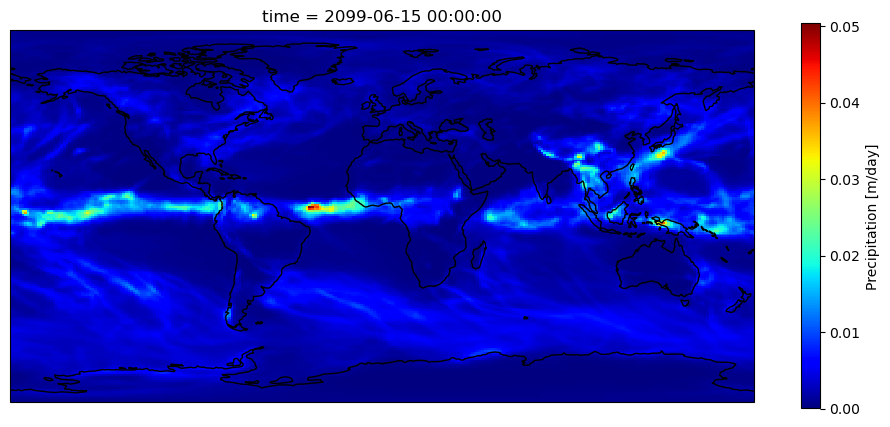

In [26]:
fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

dset['pr'].sel(time='209906').plot(ax=ax, cmap='jet',
                   transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

To select June 2099, we used xarray select **sel**. This is a very powerful tool with which you can specify a particular value you wish to select. You can also add a method such as nearest to select the closest point to a given value. You can even select all the values inside a range (inclusive) with slice:

In [29]:
dset['pr'].sel(time=slice('209906', '209909', 3))

<xarray.DataArray 'pr' (time: 2, lat: 192, lon: 288)> Size: 442kB
array([[[0.00064667, 0.00064667, 0.00064667, ..., 0.00064667,
         0.00064667, 0.00064667],
        [0.00065756, 0.00066274, 0.00066786, ..., 0.00064321,
         0.00064774, 0.00065259],
        [0.00052792, 0.00052669, 0.00052577, ..., 0.00052965,
         0.00052968, 0.0005291 ],
        ...,
        [0.00096371, 0.00097689, 0.00095931, ..., 0.0009342 ,
         0.00094003, 0.000949  ],
        [0.00102278, 0.00102784, 0.0010366 , ..., 0.00101871,
         0.00101704, 0.00102145],
        [0.00069725, 0.00069829, 0.00069814, ..., 0.00069901,
         0.00069825, 0.00069684]],

       [[0.00060047, 0.00060047, 0.00060047, ..., 0.00060047,
         0.00060047, 0.00060047],
        [0.00064807, 0.00064914, 0.00065099, ..., 0.00064471,
         0.00064618, 0.00064726],
        [0.00055149, 0.00054627, 0.00054068, ..., 0.00056622,
         0.00056096, 0.0005562 ],
        ...,
        [0.00206277, 0.00205825, 0.00204676, ..., 0.00205663,
         0.00206506, 0.00205594],
        [0.00168889, 0.00168396, 0.00166815, ..., 0.00173792,
         0.00172001, 0.00170925],
        [0.00198747, 0.00198722, 0.00198749, ..., 0.00198742,
         0.00198953, 0.00198727]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 16B 2099-06-15 00:00:00 2099-09-15 00:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        chunits( ((1000 * PRECT)), units="kg m-2 s-1")
    description:    at surface; includes both liquid and solid phases from al...
    frequency:      mon
    id:             pr
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Precipitation
    type:           real
    units:          m/day
    variable_id:    pr